In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
data = pd.read_csv('repositories.csv', parse_dates=['Created At', 'Updated At'])

# lister chaque columns du csv et dire a quoi elles correspondent

In [23]:
# TODO: Rajouter une etape de nettoyage des données

# changer les Vim script en Vim Script
data['Language'] = data['Language'].replace('Vim script', 'Vim Script')

<Axes: xlabel='Created At'>

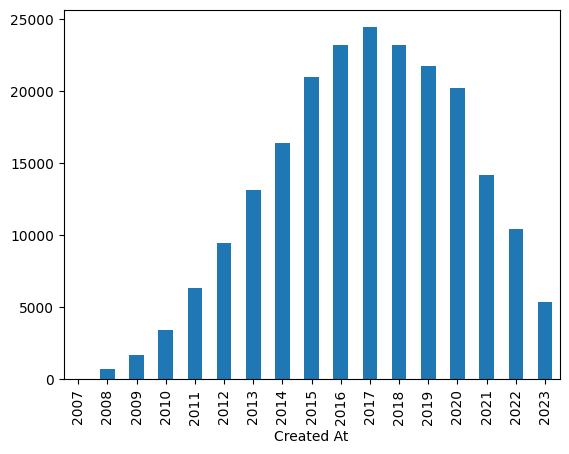

In [24]:
# Plot qui montre le nombre de repository créé par année
data.groupby(data['Created At'].dt.year).size().plot(kind='bar')

<Axes: xlabel='Language'>

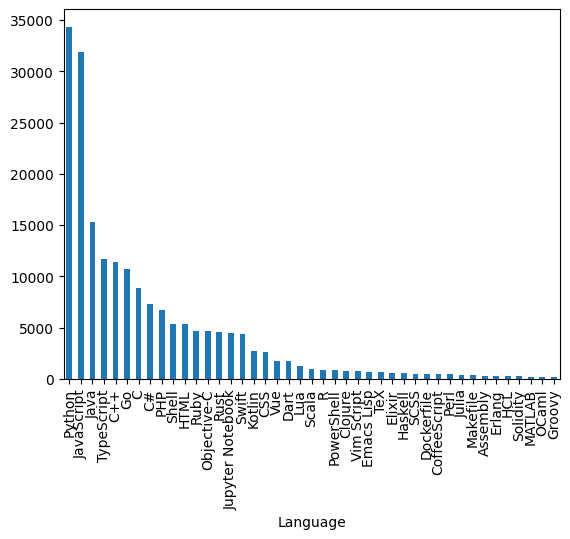

In [25]:
# Plot qui regroupe les langages de programmation par nombre de repository et enlever si le langage est utilisé sur moins de 20 repository
data.groupby('Language').filter(lambda x: len(x) > 200).groupby('Language').size().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Created At'>

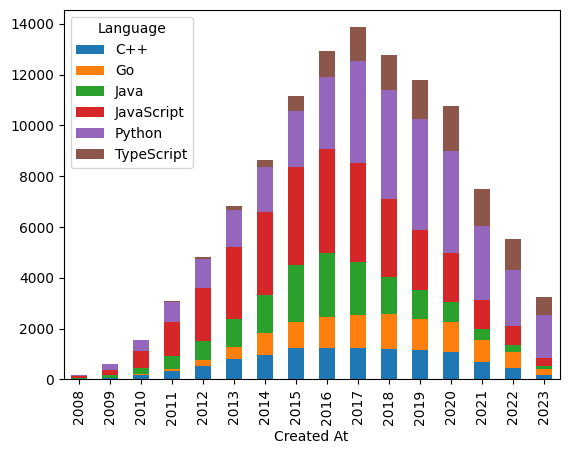

In [26]:
# Plot qui montre l'evolution des langages de programmation par année et enlever si le langage est utilisé sur moins de 200 repository
data.groupby('Language').filter(lambda x: len(x) > 10000).groupby([data['Created At'].dt.year, 'Language']).size().unstack().plot(kind='bar', stacked=True)

In [27]:
# Plot cluster de repos par topics
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from sklearn.decomposition import TruncatedSVD
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import Normalizer
#
# vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english', use_idf=True)
# X = vectorizer.fit_transform(data['Topics'].fillna(''))
# svd = TruncatedSVD(100)
# normalizer = Normalizer(copy=False)
# lsa = make_pipeline(svd, normalizer)
# X = lsa.fit_transform(X)
#
# km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1)
# km.fit(X)
#
# original_space_centroids = svd.inverse_transform(km.cluster_centers_)
# order_centroids = original_space_centroids.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(10):
#     print("Cluster %d:" % i, end='')
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind], end='')
#     print()

In [28]:
# box plot pour voir la relation entre le nombre de stars et le has_wiki
# sns.boxplot(x='Stars', y='Has Wiki', data=data)

In [29]:
# sns.boxplot(x='Has Wiki', y='Stars', data=data)

0.9679206060577875


<Axes: xlabel='Created At'>

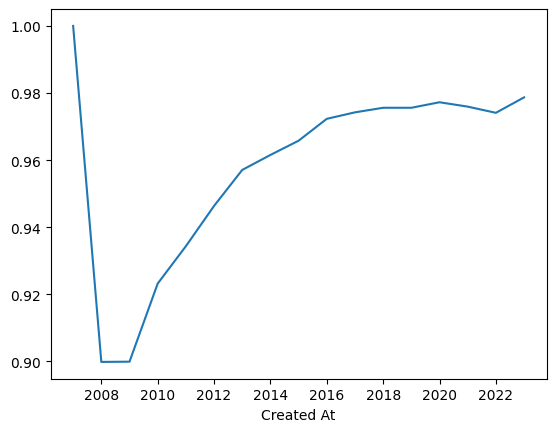

In [30]:
# Quel est le % de repository qui ont des issues
print(data['Has Issues'].mean())

# Un plot classique qui montre le % de has issues = true dans le temps
data.groupby(data['Created At'].dt.year)['Has Issues'].mean().plot(kind='line')

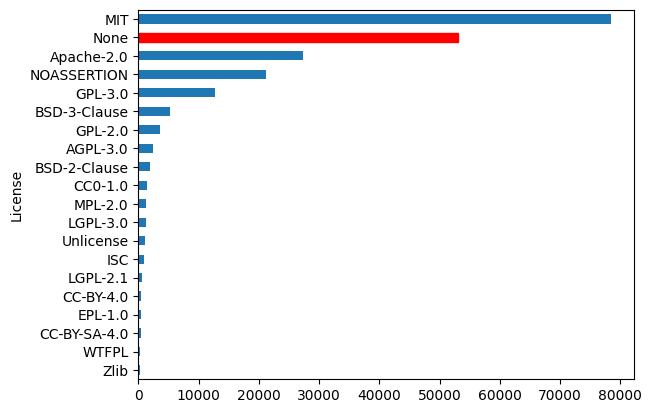

In [31]:
# Plot qui regroupe les licences par nombre de repository et enlever si la licence est utilisé sur moins de 20 repository, ajoute les valeurs null, highlight les licences les plus utilisées
data['License'] = data['License'].fillna('None')
licences = data.groupby('License').filter(lambda x: len(x) > 200).groupby('License').size().sort_values(ascending=True)
licences.plot(kind='barh')
highlight = 'None'
pos = licences.index.get_loc(highlight)
plt.gca().get_children()[pos].set_color('r')

# prendre la moyenne des stars par licence

In [32]:
# faire une heatmap

<Axes: xlabel='Stars', ylabel='Issues'>

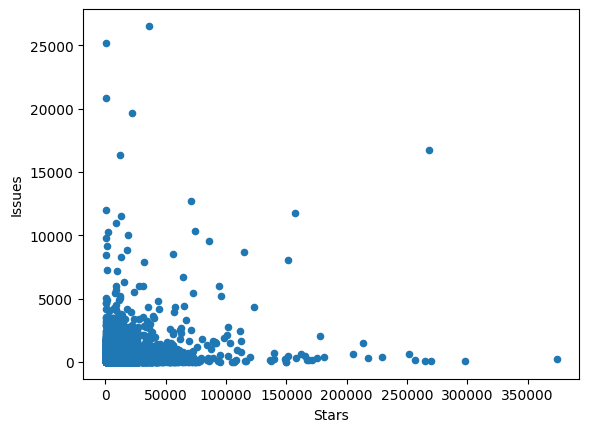

In [33]:
# plot de la correlation nb stars et nb Issues
data.plot(kind='scatter', x='Stars', y='Issues')

<Axes: xlabel='Stars', ylabel='Forks'>

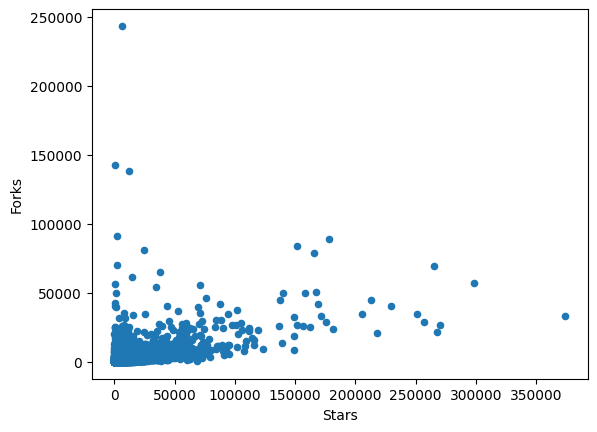

In [34]:
# plot de la correlation nb stars et nb Forks
data.plot(kind='scatter', x='Stars', y='Forks')

<Axes: xlabel='Stars', ylabel='Watchers'>

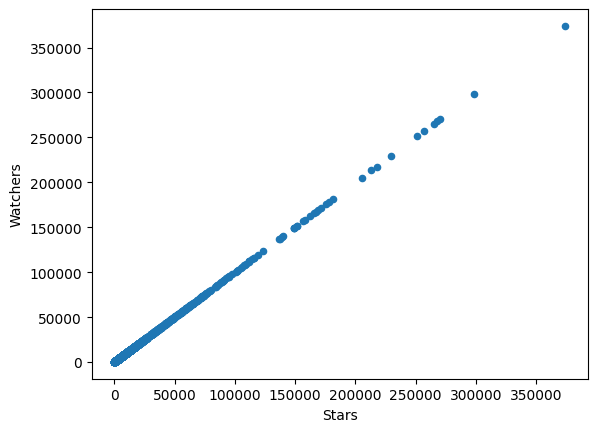

In [35]:
# plot de la correlation nb stars et nb Watchers
data.plot(kind='scatter', x='Stars', y='Watchers')

<Axes: xlabel='Created At'>

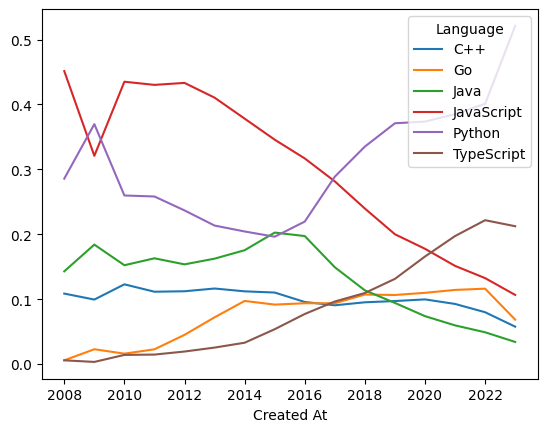

In [36]:
# plot classique avec plusieurs lignes avec en ordonnee le % des 10 langages les plus utilises et en absisse les annees
topLanguages = data.groupby('Language').filter(lambda x: len(x) > 10000).groupby([data['Created At'].dt.year, 'Language']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
topLanguages.plot(kind='line')

<Axes: xlabel='Created At'>

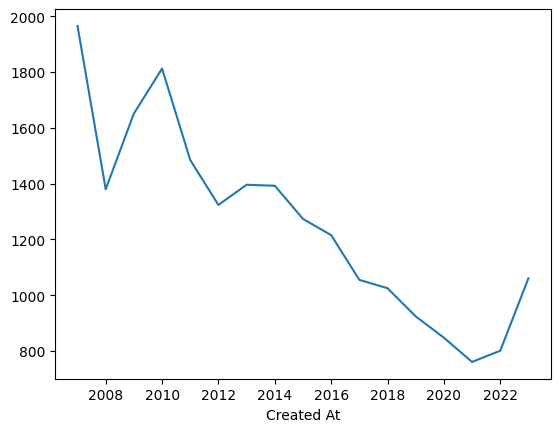

In [37]:
# plot qui montre l'evolution du nombre de stars au cours du temps
data.groupby(data['Created At'].dt.year)['Stars'].mean().plot(kind='line')

<Axes: xlabel='Created At'>

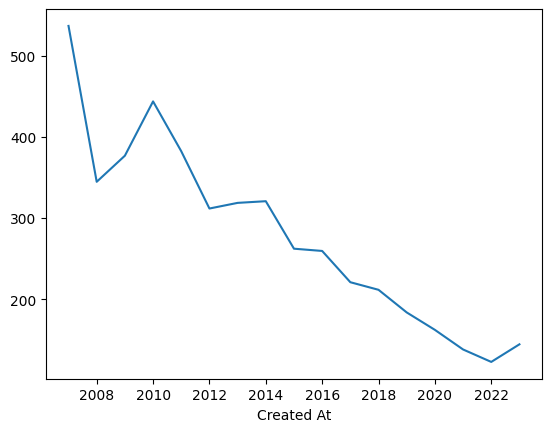

In [38]:
# plot qui montre l'evolution du nombre de forks au cours du temps
data.groupby(data['Created At'].dt.year)['Forks'].mean().plot(kind='line')

<Axes: xlabel='Created At'>

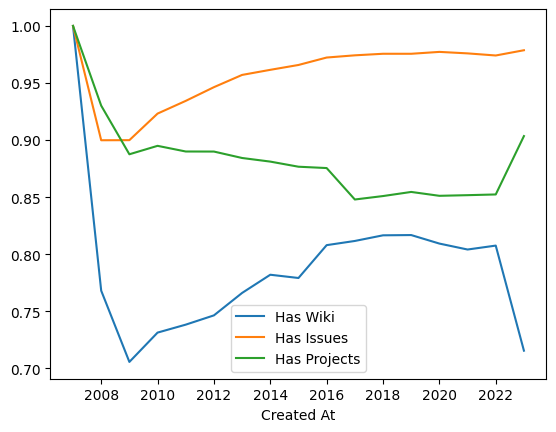

In [39]:
# plot montrant l'utilisation des wiki, issues et projects
data.groupby(data['Created At'].dt.year)[['Has Wiki', 'Has Issues', 'Has Projects']].mean().plot(kind='line')